In [14]:
!pip install yfinance
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 532.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.8 M

In [15]:
import yfinance as yf
from datetime import datetime

# Get the current date
current_date = datetime.today().strftime('%Y-%m-%d')

# Fetch data for AAPL from Yahoo Finance with current date as the end date
df = yf.download('AAPL', start='2020-01-01', end=current_date)

# Display the first few rows of the DataFrame
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650368,132079200


In [16]:
#Specifying the target class
df = df['Close']
df

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-05-22    190.899994
2024-05-23    186.880005
2024-05-24    189.979996
2024-05-28    189.990005
2024-05-29    190.289993
Name: Close, Length: 1109, dtype: float64

In [17]:
df.shape

(1109,)

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#performing MinMax normalization(Preprocessing technique)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
scaled_df

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.9427535 ],
       [0.94282398],
       [0.94493631]])

In [19]:
scaled_df.shape

(1109, 1)

In [20]:
#splitting data into train and test
training_size = int(len(scaled_df)*0.7)
test_size = len(scaled_df)-training_size
train_data, test_data = scaled_df[0:training_size, :], scaled_df[training_size:len(scaled_df), :1]

In [21]:
#creating function to create train and test datsets by using time step
def create_dataset(df,time_step):
  x,y = [],[]
  for i in range(len(df)-time_step-1):
    x.append(df[i:(i+time_step), 0])
    y.append(df[i+time_step])
  return np.array(x), np.array(y)


In [22]:
#applying time step to the train and test
x_train, y_train = create_dataset(train_data,100)
x_test, y_test = create_dataset(test_data,100)

In [23]:
print(x_test.shape)
print(y_test.shape)

(232, 100)
(232, 1)


In [24]:
#modifying the shape of the x_train and x_test to be fit to use them in the model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_test)

[[[0.62905975]
  [0.66701292]
  [0.69292517]
  ...
  [0.9217702 ]
  [0.91951691]
  [0.90958863]]

 [[0.66701292]
  [0.69292517]
  [0.6734205 ]
  ...
  [0.91951691]
  [0.90958863]
  [0.92923405]]

 [[0.69292517]
  [0.6734205 ]
  [0.69398133]
  ...
  [0.90958863]
  [0.92923405]
  [0.93761332]]

 ...

 [[0.96070906]
  [0.91219391]
  [0.90240639]
  ...
  [0.95021735]
  [0.95944166]
  [0.94923156]]

 [[0.91219391]
  [0.90240639]
  [0.88592957]
  ...
  [0.95944166]
  [0.94923156]
  [0.92092527]]

 [[0.90240639]
  [0.88592957]
  [0.88078929]
  ...
  [0.94923156]
  [0.92092527]
  [0.9427535 ]]]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [26]:
#initializing the sequential model to add layers
model = Sequential()
#starting adding layers
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mean_squared_error')
model.summary()

/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#fitting the model upon the training data
#providing the validation data compare between the training loss and test loss
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - loss: 0.1943 - val_loss: 0.0061
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.0124 - val_loss: 0.0252
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.0074 - val_loss: 0.0274
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.0058 - val_loss: 0.0120
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0050 - val_loss: 0.0200
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0042 - val_loss: 0.0102
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 0.0035 - val_loss: 0.0066
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 0.0033 - val_loss: 0.0057
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2

In [28]:
#predicting the value of y_train
y_train_pred = model.predict(x_train)
#predicting the value of y_test
y_test_pred = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [29]:
#returning the predicted values to its original scale before normalization
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

In [30]:
#returning the actual values to its original scale before normalization to evaluate the model
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

y_test

array([[188.05999756],
       [189.25      ],
       [189.58999634],
       [193.97000122],
       [192.46000671],
       [191.33000183],
       [191.80999756],
       [190.67999268],
       [188.61000061],
       [188.08000183],
       [189.77000427],
       [190.53999329],
       [190.69000244],
       [193.99000549],
       [193.72999573],
       [195.1000061 ],
       [193.13000488],
       [191.94000244],
       [192.75      ],
       [193.61999512],
       [194.5       ],
       [193.22000122],
       [195.83000183],
       [196.44999695],
       [195.61000061],
       [192.58000183],
       [191.16999817],
       [181.99000549],
       [178.8500061 ],
       [179.80000305],
       [178.19000244],
       [177.97000122],
       [177.78999329],
       [179.46000671],
       [177.44999695],
       [176.57000732],
       [174.        ],
       [174.49000549],
       [175.83999634],
       [177.22999573],
       [181.11999512],
       [176.38000488],
       [178.61000061],
       [180

In [31]:
#Evaluating the model
#calculating the r2 score for both the train and test predictions to detect overfitting
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)
#calculating the r2 score for train predictions
print("R2 score of train predictions: ",r2_train)
#calculating the r2 score for test predictions
print("R2 score of test predictions: ",r2_test)

R2 score of train predictions:  0.9682956193017648
R2 score of test predictions:  0.8427236776439949


In [32]:
import matplotlib.pyplot as plt

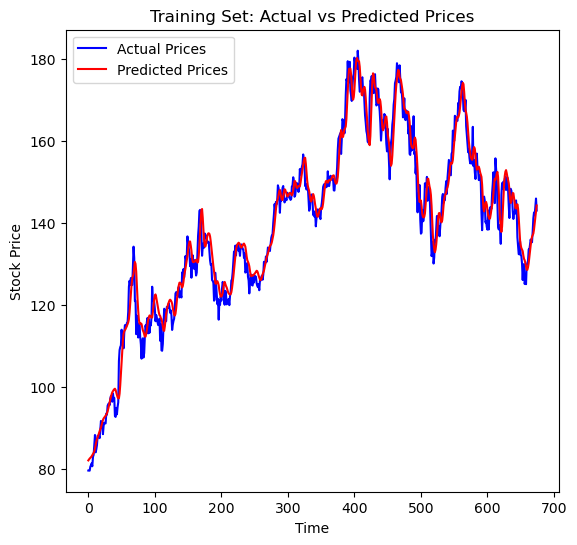

In [33]:
# Plotting the actual vs predicted prices for the training set
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_train, color='blue', label='Actual Prices')
plt.plot(y_train_pred, color='red', label='Predicted Prices')
plt.title('Training Set: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

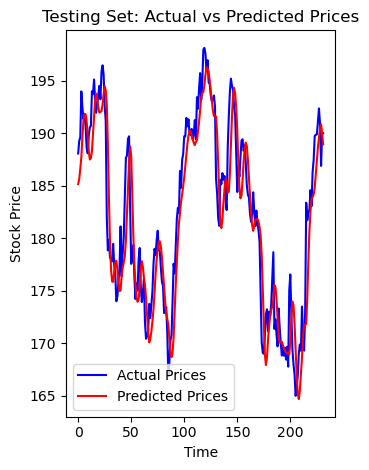

In [34]:
plt.subplot(1, 2, 2)
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(y_test_pred, color='red', label='Predicted Prices')
plt.title('Testing Set: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()

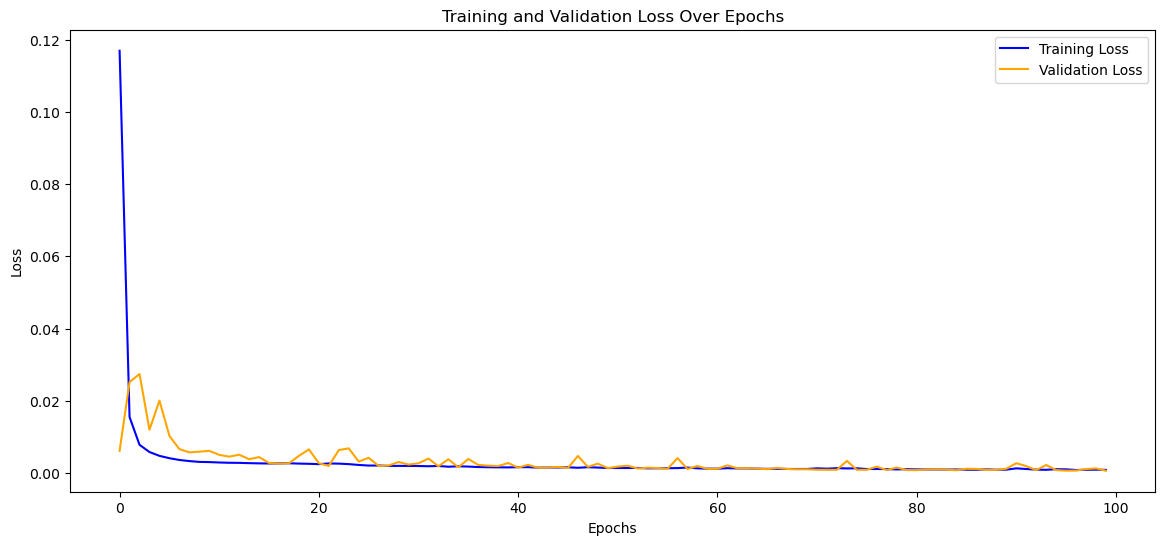

In [35]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()